# 4. 단순 선형 회귀

---

## 학습 목표
- 선형 회귀 분석 모델에서 least square solution을 사용하여 최적의 선형 파라미터를 구할 수 있습니다.
- least square solution을 사용하여 단순 선형 회귀 class를 구현할 수 있습니다.
- 단순 선형 회귀 모델을 평가하는 방법들에 대해서 학습합니다.

---

## 목차

### 1. Least square 최적화
1. 단순 선형 회귀 least square solution

### 2. 단순 선형 회귀 class 
1. 단순 선형 회귀 class 구조
2. 함수 정의
3. scikit-learn 모듈

### 3. 단순 선형 회귀 평가
1. RMSE, RMAE
2. R2, adjusted R2


---

## 1.  Least square 최적화

### 1-1. 단순 선형 회귀 least square solution

선형 회귀 모델과 모델을 평가하는 loss 함수에 대해서 학습하였고 이제는 loss 값을 줄이는 파라미터를 어떻게 찾는지 알아봅시다.

본격적으로 최적화 과정에 들어가기 앞서 **학습 데이터**와 **단순 선형 모델**를 정리하여 봅시다.

#### 학습 데이터

우선 데이터는 아래와 같이 정의 합시다.

##### 학습용 feature 데이터

> $$X=[x_1,x_2,x_3,...,x_N]^T$$

###### 학습용 lable 데이터

> $$Y=[y_1,y_2,y_3,...,y_N]^T$$

딘순 선형 회귀에서는 feature 데이터는 1가지 종류의 데이터에 대해서만 고려하여 $N$개의 샘플을 갖는 column 벡터 형태로 정의합니다. label 데이터도 마찬가지로 $N$개의 샘플을 갖는 column 벡터 형태로 정의하여 각 feature와 label 데이터가 매치됩니다.

#### 단순 선형 회귀 모델

이번엔 단순 선형 모델에 대해서 정의해 봅시다.

단순 선형 모델은 1개의 feature column을 입력으로 하여 1차 함수 형태로 회귀 모델을 구현한 것을 의미합니다.

##### 단순 선형 회귀 모델 

> $$f(x_i)=w_O+w_1 x_i$$

$w_0, w_1$은 1차 함수 모델 $f()$의 파라미터를 의미합니다.

#### loss 함수 최적화

단순 선형 회귀 모델을 정리 했으니 마지막으로 loss 함수를 정리해 봅시다.

##### loss 함수

> $$
\begin{aligned}
Loss(w_0, w_1)&=\frac{1}{N}\sum_{i=1}^{N}(y_i-f(x_i))^{2} \\
&=\frac{1}{N}\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))^{2}
\end{aligned}
$$

이렇게 정리한 수식에서 선형 파라미터인 $w_0, \; w_1$를 제외한 $y_i, \; x_i,\; N$은 주어진 상수이기에 변수인 선형 파라미터를 조정하여 loss 값을 변화시킬 수 있습니다. 따라서 최적의 모델을 구하기 위해선 선형 파라미터를 조정하여 loss 값을 최소로 만들어야 합니다.

최소로 만드는 선형 파라미터를 찾기 위해선 선형 파라미터에 따라서 loss 값이 어떻게 변하는지 알 수 있다면 쉽게 찾을 수 있을겁니다. 그렇기에 선형 파라미터인 $w_0, \; w_1$에 따라 loss값이 어떻게 변하는지 알아보도록 하겠습니다.

loss 함수를 $w_0$ 또는 $w_1$에 대해서 정리를 한다면 아래와 같습니다. 

- $w_0$에 대한 정리 : $A_{0}w_{0}^{2}+B_{0}w_{0}+C_{0}$

- $w_1$에 대한 정리 : $A_{1}w_{1}^{2}+B_{1}w_{1}+C_{1}$

상수 값들인 $A_{0},B_{0},...,C_{1}$의 값이 무엇인지는 크게 신경쓰지 않으셔도 됩니다.

여기서 중요한 것은 loss 함수는 $w_0, w_1$에 대해서 각각 이차 함수 형태로 정리되어 있다는 것을 의미합니다.

$A_{0}=1, \; B_{0}=2, \; C_{0}=1$인 경우에 대해서 예제로 출력해 봅시다.

##### <예제 1> w0에 따른 loss 값 그래프

$A_{0}=1, \; B_{0}=2, \; C_{0}=1$인 경우, $w_0$를 x축으로 하고 그에 대응하는 loss 값을 y축으로 출력합니다.

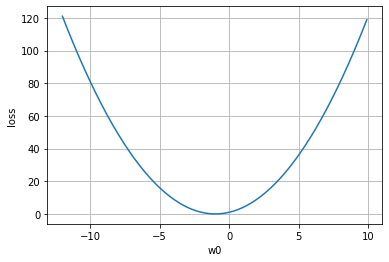

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# w0 범위
w0 = np.arange(-12,10,0.1)

# loss 함수 정의
loss_w0 = 1*w0**2 + 2*w0 + 1

# 출력
plt.plot(w0, loss_w0)
plt.xlabel('w0')
plt.ylabel('loss')
plt.grid()
plt.show()

위 그래프처럼 특정 $w_{0}$(정확히는 -1)에서 loss 값이 최저로 떨어진 것을 볼 수 있습니다. 마찬가지로 $w_1$도 이차 함수이기에 최소값을 갖습니다.

문제는 $w_0, w_1$를 조절하여 동시에 최저값을 갖는 지점을 찾는 것입니다. ($A_{0},B_{0},C_{0}$에는 $w_{1}$이 섞여 있고 그반대도 마찬가지이기에 문제가 됩니다.)

자 그럼 이것을 해결하는 방법을 알아봅시다.

선형 회귀 모델에서는 이 값을 공식 하나로 해결 할 수 있는 방식이 존재합니다.

마치 이차 방정식 해를 구하는 것처럼 **least square** 방식으로 사용하면 최적의 선형 파라미터를 구하는 공식을 얻을 수 있습니다.

유도 방식은 일단 생략하고 공식부터 써 보겠습니다. (심화 학습에서 공식 유도)

##### least square solution

> $$\begin{pmatrix}
w_{0} \\ 
w_{1} \\
\end{pmatrix} = \begin{pmatrix}
\sum_{i=1}^{N}1 & \sum_{i=1}^{N}x_{i} \\ 
\sum_{i=1}^{N}x_{i} & \sum_{i=1}^{N}x_{i}^{2} \\ 
\end{pmatrix}^{-1}\begin{pmatrix}
\sum_{i=1}^{N}y_{i} \\ 
\sum_{i=1}^{N}x_{i}y_{i}
\end{pmatrix}.$$

위 공식은 least square의 일반적인 형태는 아니고 단순 선형 회기에 맞게끔 정리된 수식입니다.

일반적인 least square는 이후 다중 회귀 파트에서 정리하도록 하겠습니다.

위 공식을 사용하게 되면 우리는 loss 값을 최소로 하는 파라미터를 구할 수 있습니다.

이 과정을 우리는 **학습 과정**이라 하고 이를 통하여 선형 파라미터는 최적으로 튜닝됩니다.

##### <예제 2>  least square 구현

아래 예제를 수행하여 least square로 구한 선형파라미터를 사용하여 loss 값을 출력해봅시다.

In [7]:
import numpy as np

# 학습용 데이터 설정
feature_data = np.array([1,2,3,4]).reshape((-1,1))
label_data = np.array([3.1,4.9,7.2,8.9]).reshape((-1,1))

# least sqaure 공식을 위한 배열 계산
leastsquare1 = np.array([[feature_data.size, np.sum(feature_data)],[np.sum(feature_data), np.sum(feature_data**2)]])
leastsquare2 = np.array([[np.sum(label_data)],[np.sum(feature_data*label_data)]])

# least square solution
W = np.dot(np.linalg.inv(leastsquare1),leastsquare2)
w0 = W[0]
w1 = W[1]

# 단순 선형 모델 함수
f_x = w1*feature_data + w0

# loss 함수
def loss(f_x, label_data):
    error = label_data - f_x
    ls = np.mean(error**2)
    return ls

# loss 값 출력
print("loss: {}\n".format(loss(f_x,label_data)))

loss: 0.01574999999999998



 ---

**심화 학습 - 단순 선형 회귀 least square 유도**

파라미터의 이차 함수 형태로 정의된 loss 함수는 최소인 지점에서 기울기가 0입니다. 

이러한 이차 함수의 특성을 이용하여 각 파리미터에 대한 편미분 구하게 되면 다음과 같은 연립 방정식을 얻을 수 있습니다.

##### Loss 함수 정의

> $$Loss(w_0, w_1)=\frac{1}{N}\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))^{2}$$

##### Loss 편미분

> $$\frac{\partial Loss}{\partial w_0}=\frac{2}{N}\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))$$,

> $$\frac{\partial Loss}{\partial w_1}=\frac{2}{N}\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))(-x_i)$$.

##### 기울기  0 조건으로 유도한 연립 방정식

> $$\frac{2}{N}\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))=0$$,

> $$\frac{2}{N}\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))(-x_i)=0$$.

곱하여져 있는 상수를 정리하면 아래와 같이 정리할 수 있습니다.

##### 2/N 정리

> $$\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))=0$$,

> $$\sum_{i=1}^{N}(y_i-(w_O+w_1 x_i))x_i=0$$.

이제는 $w_0, w_1$에 대해서 정리해봅시다.

##### w_0, w_1에 대해서 정리

> $$(\sum_{i=1}^{N}1)w_0 + (\sum_{i=1}^{N}x_i)w_1 = \sum_{i=1}^{N}y_i$$,

> $$(\sum_{i=1}^{N}x_i)w_0 + (\sum_{i=1}^{N}x_{i}^{2})w_1 = \sum_{i=1}^{N}x_i y_i$$.

이를 행렬식으로 표현하면 다음과 같습니다.

##### 행렬식 표현

> $$\begin{pmatrix}
\sum_{i=1}^{N}1 & \sum_{i=1}^{N}x_{i} \\ 
\sum_{i=1}^{N}x_{i} & \sum_{i=1}^{N}x_{i}^{2} \\ 
\end{pmatrix}\begin{pmatrix}
w_{0} \\ 
w_{1} \\
\end{pmatrix} = \begin{pmatrix}
\sum_{i=1}^{N}y_{i} \\ 
\sum_{i=1}^{N}x_{i}y_{i}
\end{pmatrix}.$$

 양변에 역행렬을 곱하여 정리하면 위 공식을 구할 수 있습니다.

역행렬은 아래 수식을 만족하는 경우 존재 하지 않는데

##### determinat 검사

> $$\det(\begin{pmatrix}
\sum_{i=1}^{N}1 & \sum_{i=1}^{N}x_{i} \\ 
\sum_{i=1}^{N}x_{i} & \sum_{i=1}^{N}x_{i}^{2} \\ 
\end{pmatrix})=\sum_{i=1}^{N}1\sum_{i=1}^{N}x_{i}^{2} - (\sum_{i=1}^{N}x_{i})^{2} =0$$.

위 수식이 만족하려면 모든 $x_i$는 같은 값을 가져야 하기에 일반적으로는 역행렬은 항상 존재합니다.

---